In [1]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

2024-07-09 11:30:35.979783: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


2024-07-09 11:30:37.740310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-09 11:30:38.649331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:30:38.649401: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-09 11:30:38.649440: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-09 11:30:38.654180: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-09 11:30:38.654367: I tensorflow/str

In [3]:
train_data_path = '../datasets/ready/train/'
val_data_path = '../datasets/ready/val/'

#loading the datasets
x_train = load_data(train_data_path+"x_train.csv")
y_train = load_data(train_data_path+"y_train.csv")
x_val = load_data(val_data_path+"/x_val.csv")
y_val = load_data(val_data_path+"/y_val.csv")

In [4]:
save_path = '../models'
# Setting up hyperparameters
batch_size = 64
epochs = 256

optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [5]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics, x_train=x_train)

2024-07-09 11:30:38.862582: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 11:30:38.867788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 11:30:38.867892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-09 11:30:38.868222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

In [6]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

2024-07-09 11:30:40.029296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-09 11:30:40.029909: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496000000 Hz


Epoch 1/256


2024-07-09 11:30:40.485263: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


9/9 [==============================] - 2s 23ms/step - loss: 0.6767 - accuracy: 0.6142 - val_loss: 0.6386 - val_accuracy: 0.6236


2024-07-09 11:30:41.428533: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-07-09 11:30:41.428703: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 2/256
9/9 [==============================] - 0s 8ms/step - loss: 0.6497 - accuracy: 0.6180 - val_loss: 0.6349 - val_accuracy: 0.6236
Epoch 3/256
9/9 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.6180 - val_loss: 0.6281 - val_accuracy: 0.6236
Epoch 4/256
9/9 [==============================] - 0s 8ms/step - loss: 0.6387 - accuracy: 0.6180 - val_loss: 0.6285 - val_accuracy: 0.6236
Epoch 5/256
9/9 [==============================] - 0s 10ms/step - loss: 0.6304 - accuracy: 0.6180 - val_loss: 0.6185 - val_accuracy: 0.6236
Epoch 6/256
9/9 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.6573 - val_loss: 0.6194 - val_accuracy: 0.6910
Epoch 7/256
9/9 [==============================] - 0s 9ms/step - loss: 0.6340 - accuracy: 0.6423 - val_loss: 0.6290 - val_accuracy: 0.6910
Epoch 8/256
9/9 [==============================] - 0s 8ms/step - loss: 0.6320 - accuracy: 0.6798 - val_loss: 0.6089 - val_accuracy: 0.6910
Epoch 9/256
9/9 [=========

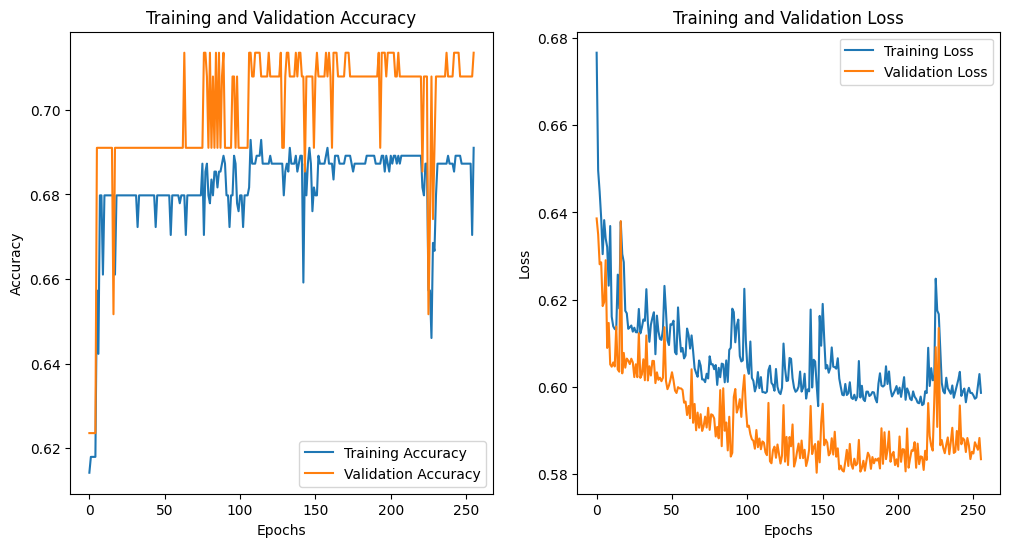

In [7]:
# Get predictions on the training data
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-07-09 11:31:08.935921: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
